### Setting up

In [4]:
import backtrader as bt
import pandas as pd
import datetime
import backtrader.feeds as btfeeds
from IPython.core.interactiveshell import InteractiveShell 
import pyecharts.options as opts
from pyecharts.charts import Grid,Line,Page,Scatter,Page,Bar
from pyecharts.faker import Faker
InteractiveShell.ast_node_interactivity = "all"
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
import numpy as np
from collections import deque
from tabulate import tabulate
st_date = datetime.datetime(2019, 11, 1)
ed_date = datetime.datetime(2022, 5, 21)

In [17]:

if_codes = ['IF1910','IF1911','IF1912',
            'IF2001','IF2002','IF2003','IF2004','IF2005','IF2006',
            'IF2007','IF2008','IF2009','IF2010','IF2011','IF2012',
            'IF2101','IF2102','IF2103','IF2104','IF2105','IF2106',
            'IF2107','IF2108','IF2109','IF2110','IF2111','IF2112',
            'IF2201','IF2202','IF2203','IF2204','IF2205','IF2206']
ic_codes = ['IC1910','IC1911','IC1912',
            'IC2001','IC2002','IC2003','IC2004','IC2005','IC2006',
            'IC2007','IC2008','IC2009','IC2010','IC2011','IC2012',
            'IC2101','IC2102','IC2103','IC2104','IC2105','IC2106',
            'IC2107','IC2108','IC2109','IC2110','IC2111','IC2112',
            'IC2201','IC2202','IC2203','IC2204','IC2205','IC2206']
ih_codes = ['IH1910','IH1911','IH1912',
            'IH2001','IH2002','IH2003','IH2004','IH2005','IH2006',
            'IH2007','IH2008','IH2009','IH2010','IH2011','IH2012',
            'IH2101','IH2102','IH2103','IH2104','IH2105','IH2106',
            'IH2107','IH2108','IH2109','IH2110','IH2111','IH2112',
            'IH2201','IH2202','IH2203','IH2204','IH2205','IH2206']
if_data = {}
ic_data = {}
ih_data = {}

for a in if_codes:
    if_data[a] =  pd.read_csv('Data/IF/'+a+'.csv', index_col = 0,skiprows = [0,2],parse_dates=True).dropna()
for a in ic_codes:
    ic_data[a] =  pd.read_csv('Data/IC/'+a+'.csv', index_col = 0,skiprows = [0,2],parse_dates=True).dropna()
for a in ih_codes:
    ih_data[a] =  pd.read_csv('Data/IH/'+a+'.csv', index_col = 0,skiprows = [0,2],parse_dates=True).dropna()

# csi300_map = pd.read_excel('data\CSI300.xlsx',sheet_name = ['2019','2020','2021','2022'], index_col = 0,skiprows = [0,1],parse_dates=True)
# csi500_map = pd.read_excel('data\CSI500.xlsx',sheet_name = ['2019','2020','2021','2022'], index_col = 0,skiprows = [0,1],parse_dates=True)
# sse50_map = pd.read_excel('data\SSE50.xlsx',sheet_name = ['2019','2020','2021','2022'], index_col = 0,skiprows = [0,1],parse_dates=True)
# csi300 = pd.concat([csi300_map[a] for a in csi300_map.keys()]).sort_index().drop_duplicates()
# csi500 = pd.concat([csi500_map[a] for a in csi500_map.keys()]).sort_index().drop_duplicates()
# sse50 = pd.concat([sse50_map[a] for a in sse50_map.keys()]).sort_index().drop_duplicates()


In [18]:
ih_data

{'IH1910':                     open    high     low   close  volume      oi
 time                                                            
 Fetching...       2989.4  2993.2  2981.4  2981.4    40.0  3758.0
 2019-09-10 09:31  2982.2  2982.6  2977.8  2978.6    34.0  3741.0
 2019-09-10 09:32  2975.0  2975.0  2970.2  2970.2    19.0  3734.0
 2019-09-10 09:33  2968.8  2973.6  2966.4  2972.6    22.0  3721.0
 2019-09-10 09:34  2971.6  2971.8  2970.0  2970.2    38.0  3709.0
 ...                  ...     ...     ...     ...     ...     ...
 2019-10-18 14:56  2974.2  2974.2  2974.0  2974.0     7.0  2028.0
 2019-10-18 14:57  2974.0  2974.2  2974.0  2974.2    24.0  2007.0
 2019-10-18 14:58  2974.2  2974.6  2974.2  2974.6    22.0  1994.0
 2019-10-18 14:59  2974.4  2974.6  2974.2  2974.2    38.0  1969.0
 2019-10-18 15:00  2974.2  2974.2  2974.2  2974.2     0.0  1969.0
 
 [5523 rows x 6 columns],
 'IH1911':                        open    high     low   close  volume    oi
 time                      

In [15]:
pd.read_csv('Data\IH\IH1912.csv').dropna()

IH1912.CFE CFFEX-IH1912 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0                 time         open       high        low      close   
1      2019/11/11 9:30         2992       2995     2987.4     2991.4   
2      2019/11/11 9:31         2991       2991       2986       2989   
3      2019/11/11 9:32         2989       2990       2987     2988.8   
4      2019/11/11 9:33       2988.8     2988.8     2983.6     2986.2   
...                ...          ...        ...        ...        ...   
7256  2019/12/20 14:56       3018.4     3018.6     3018.2     3018.4   
7257  2019/12/20 14:57       3018.2     3018.6     3018.2     3018.6   
7258  2019/12/20 14:58       3018.6     3018.6     3018.2     3018.4   
7259  2019/12/20 14:59       3018.4     3018.6     3018.2     3018.4   
7260  2019/12/20 15:00       3018.4     3018.4     3018.4     3018.4   

     Unnamed: 5 Unnamed: 6  
0        volume         oi  
1           402      22327  
2           297      22268  
3           131      22230  
4           188      22173  
...         ...        ...  
7256         34       3366  
7257         34       3332  
7258        101       3235  
7259        142       3097  
7260          0       3097  

[7239 rows x 7 columns]

In [6]:
stock_index = pd.read_excel('Data\Stock_Index.xlsx',index_col=0,skiprows=[0,1,2] )
stock_index.columns = ['csi300','sse50','csi500']

In [7]:
if_data

{'IF1910':                        open    high     low   close  volume    oi
 time                                                             
 2019-09-10 09:30:00  3972.0  3975.2  3965.0  3965.0      59  6791
 2019-09-10 09:31:00  3966.0  3966.0  3960.0  3962.2      43  6777
 2019-09-10 09:32:00  3960.6  3960.6  3955.8  3956.0      40  6773
 2019-09-10 09:33:00  3956.4  3959.6  3954.0  3959.6      69  6734
 2019-09-10 09:34:00  3959.4  3959.4  3955.2  3955.8      52  6723
 ...                     ...     ...     ...     ...     ...   ...
 2019-10-18 14:56:00  3880.8  3880.8  3880.2  3880.4      67  4618
 2019-10-18 14:57:00  3880.2  3880.8  3880.2  3880.8     143  4499
 2019-10-18 14:58:00  3881.0  3881.8  3880.6  3880.8     127  4472
 2019-10-18 14:59:00  3881.2  3881.8  3880.6  3880.6     123  4413
 2019-10-18 15:00:00  3880.6  3880.6  3880.6  3880.6       0  4413
 
 [5566 rows x 6 columns],
 'IF1911':                        open    high     low   close  volume    oi
 time         

In [68]:
stock_index_val_chg =  stock_index.diff(1)
stock_index_val_chg.csi300 = stock_index_val_chg.csi300 *3
stock_index_val_chg.sse50 = stock_index_val_chg.sse50 *3
stock_index_val_chg.csi500 = stock_index_val_chg.csi500 *2
stock_index_val_chg['if_coef'] = np.nan
stock_index_val_chg['ic_coef'] = np.nan
stock_index_val_chg['if_lot'] = np.nan
stock_index_val_chg['ic_lot'] = np.nan
stock_index_val_chg['ih_lot'] = np.nan
stock_index_val_chg.reset_index(inplace=True)

import sklearn.linear_model
ransac = sklearn.linear_model.RANSACRegressor()
X = stock_index_val_chg[['csi300','csi500']].dropna()
y = stock_index_val_chg['sse50'].dropna()
window_size = 180


ransac.fit(X,y)
for i in  np.arange(window_size,len(stock_index_val_chg)):
    start_idx = max(i-window_size+1,1)
    X = stock_index_val_chg[['csi300','csi500']].iloc[start_idx:i]
    y = stock_index_val_chg['sse50'].iloc[start_idx:i]
    ransac.fit(X,y)
    stock_index_val_chg.loc[i,'if_coef'] = ransac.estimator_.coef_[0]
    stock_index_val_chg.loc[i,'ic_coef'] = ransac.estimator_.coef_[1]
    stock_index_val_chg.loc[i,'if_lot'] = ransac.estimator_.coef_[0]/ransac.estimator_.coef_[1]
    stock_index_val_chg.loc[i,'ic_lot'] = 1
    stock_index_val_chg.loc[i,'ih_lot'] = -1/ransac.estimator_.coef_[1]
    # print(ransac.estimator_.coef_)
# 

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

RANSACRegressor()

In [142]:
stock_index_val_chg['if_lot_m30'] = round(-stock_index_val_chg.if_lot.rolling(14).median(),1)
stock_index_val_chg['ih_lot_m30'] = round(stock_index_val_chg.ih_lot.rolling(14).median(),1)

In [143]:
rs = stock_index_val_chg

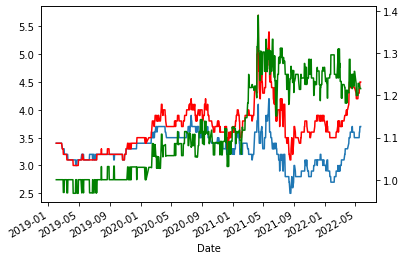

In [144]:
# stock_index_val_chg.set_index('Date',inplace=True)
ax1 = rs.if_lot_m30.plot()
ax2 = ax1.twinx()
ax1 = rs.ih_lot_m30.plot(ax = ax1,color = 'red')
ax2 = (rs.ih_lot_m30/rs.if_lot_m30).plot(ax = ax2,color = 'green')

In [186]:
# stock_index.loc['2020-1-17 14:59:00':]
# csi500.loc['2020-1-17 14:59:00':]
# csi300.loc['2020-1-17 14:59:00':]
# sse50.loc['2020-1-17 14:59:00':]
tst = pd.read_excel('data\IF.xlsx',sheet_name=None,skiprows=[0,1],index_col = 0)

In [202]:
if_data

{'IF1910':                         开盘价     最高价     最低价     收盘价     成交量   持仓量
 时间                                                               
 time                   open    high     low   close  volume    oi
 2019-09-10 09:30       3972  3975.2    3965    3965      59  6791
 2019-09-10 09:31:00    3966    3966    3960  3962.2      43  6777
 2019-09-10 09:32:00  3960.6  3960.6  3955.8    3956      40  6773
 2019-09-10 09:33:00  3956.4  3959.6    3954  3959.6      69  6734
 ...                     ...     ...     ...     ...     ...   ...
 2019-10-18 14:56:00  3880.8  3880.8  3880.2  3880.4      67  4618
 2019-10-18 14:57:00  3880.2  3880.8  3880.2  3880.8     143  4499
 2019-10-18 14:58:00    3881  3881.8  3880.6  3880.8     127  4472
 2019-10-18 14:59:00  3881.2  3881.8  3880.6  3880.6     123  4413
 2019-10-18 15:00:00  3880.6  3880.6  3880.6  3880.6       0  4413
 
 [5567 rows x 6 columns],
 'IF1911':                         开盘价     最高价     最低价     收盘价     成交量   持仓量
 时间           

In [3]:


def if_expire(dt,d):
    if dt in if_rolldate :
        return True
    return False

    


In [191]:
if_feeds = []
ic_feeds = []
ih_feeds = []

if_rolldate = []
ic_rolldate = []
ih_rolldate = []


for k in if_data.keys():
    if if_data[k].index[-1] < pd.to_datetime(st_date):
        print(if_data[k].index[-1])
        continue
    if_data[k].columns = ['Open','High','Low','Close','Volume','OpenInterest']
    if_data[k]['Volume'] = if_data[k]['Volume']*100000
    if_data[k] = if_data[k].between_time('13:00','11:29').between_time('9:30','14:59')
    if_data[k] = if_data[k].fillna(method= 'ffill')

    if_feeds.append(bt.feeds.PandasData(dataname = if_data[k],name = k))
    if_rolldate.append(if_data[k].resample('1d').last().index[-2]+datetime.timedelta(hours=14,minutes=57))

for k in ic_data.keys():
    if ic_data[k].index[-1] < pd.to_datetime(st_date):
        print(ic_data[k].index[-1])
        continue
    ic_data[k].columns = ['Open','High','Low','Close','Volume','OpenInterest']
    ic_data[k]['Volume'] = ic_data[k]['Volume']*100000
    ic_data[k] = ic_data[k].between_time('13:00','11:29').between_time('9:30','14:59')
    ic_data[k] = ic_data[k].fillna(method= 'ffill')

    ic_feeds.append( bt.feeds.PandasData(dataname = ic_data[k],name = k))

for k in ih_data.keys():
    if ih_data[k].index[-1] < pd.to_datetime(st_date):
        print(ih_data[k].index[-1])
        continue
    ih_data[k].columns = ['Open','High','Low','Close','Volume','OpenInterest']
    ih_data[k]['Volume'] = ih_data[k]['Volume']*100000
    ih_data[k] = ih_data[k].between_time('13:00','11:29').between_time('9:30','14:59')
    ih_data[k] = ih_data[k].fillna(method= 'ffill')

    ih_feeds.append( bt.feeds.PandasData(dataname = ih_data[k],name = k))



csi300 = csi300.between_time('13:00','11:29').between_time('9:30','14:59').sort_index().loc[st_date:]
csi300.fillna(inplace = True,method = 'ffill')
csi500 = csi500.between_time('13:00','11:29').between_time('9:30','14:59').sort_index().loc[st_date:]
csi500.fillna(inplace = True,method = 'ffill')
sse50 = sse50.between_time('13:00','11:29').between_time('9:30','14:59').sort_index().loc[st_date:]
sse50.fillna(inplace = True,method = 'ffill')


csi300_feed = bt.feeds.PandasData(dataname = csi300,fromdate=st_date,todate=ed_date,)
csi500_feed = bt.feeds.PandasData(dataname = csi500,fromdate=st_date,todate=ed_date,)
sse50_feed = bt.feeds.PandasData(dataname = sse50,fromdate=st_date,todate=ed_date,)




2019-10-18 15:00:00
2019-10-18 15:00:00
2019-10-18 15:00:00


In [168]:
class IFICIH_Daily_Rebase(bt.Strategy):
    params = (

        ('margin', 5.0),  
        ('distor', 1.0),
        ('bias', 0),
        ('if_lot',30),
        ('ic_lot',10),
        ('ih_lot',32),
        ('rebase_freq','d'), # d:daily, w:weekly, m:month, r:rollover
        ('rebase_opening',True),
        ('changing_size',False),
        ('rebase_bias',False),
        ('logname','ificih.csv'),

    )
    def start(self):
        header = [ 'len','Name','Code', 'Datetime', 'WeekDay', 'Open',
                  'High', 'Low', 'Close', 'Volume', 'OpenInterest']
        print(', '.join(header))

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.datetime()
        print('%s, %s' % (dt.isoformat(), txt))
    
    def write_record(self, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.datetime()
        self.portLog.write('%s, %.1f, %.1f, %.1f, %.1f, %.1f, %.1f,%.1f, %.1f, %.1f, %d, %d\n' 
                                        % ( dt.isoformat(),
                                            self.csi300_base,
                                            self.csi500_base,
                                            self.sse50_base,
                                            self.if_close[0],
                                            self.ic_close[0],
                                            self.ih_close[0],
                                            self.getpositionbyname('IF').size/10,
                                            self.getpositionbyname('IC').size/10,
                                            self.getpositionbyname('IH').size/10,
                                            self.broker.get_cash(),
                                            self.broker.get_value()
                                       )
        )
    def notify_order(self, order):  
        if order.status in [order.Completed]:
            ops = None
            
            if order.isbuy():
                ops = 'Buy'
            elif order.issell():
                ops = 'Sell'
            if order.isbuy():
                self.log('BUY EXECUTED,%s,%s,%.2f,%d,%.2f,%d,%d,%s,%.2f\n' % ( 
                                                        order.data._name,
                                                        bt.num2date(order.executed.dt),
                                                        order.executed.price,
                                                        order.executed.size,
                                                        order.executed.pnl,
                                                        order.executed.psize,
                                                        order.executed.comm,
                                                        order.ref,
                                                        self.broker.get_value())
                                                    )

            else:  # Sell
                self.log('SELL EXECUTED,%s,%s,%.2f,%d,%.2f,%d,%d,%s,%.2f\n' % ( 
                                                        order.data._name,
                                                        bt.num2date(order.executed.dt),
                                                        order.executed.price,
                                                        order.executed.size,
                                                        order.executed.pnl,
                                                        order.executed.psize,
                                                        order.executed.comm,
                                                        order.ref,
                                                        self.broker.get_value())
                                                    )
            self.tradeLog.write('%s,%s,%s,%.2f,%d,%.2f,%d,%d,%d,%s,%.2f\n' % (
                                                        order.data._name,
                                                        bt.num2date(order.executed.dt),
                                                        ops,
                                                        order.executed.price,
                                                        order.executed.size,
                                                        order.executed.pnl,
                                                        self.base_bias,
                                                        order.executed.psize,
                                                        order.executed.comm,
                                                        order.ref,
                                                        self.broker.get_value())
                                                    )
        self.order = None
        # Sentinel to None: new orders allowed
    def __init__(self):
        self.tradeLog = open('ificih_log/trade_'+self.p.logname, 'w+')
        self.tradeLog.write('Symbol,Dates,Trade,Price,Size,PnL,Base,CurrentPos,Comm,ref,Value\n')
        self.portLog = open('ificih_log/port_'+self.p.logname, 'w+')
        self.portLog.write('Datetime,CSI300,CSI500,SSE50,IF,IC,IH,IF_pos,IC_pos,IH_pos,Cash,Value\n')
        self.order = None
        self.traded = False
        self.if_close = self.data0.close
        self.ic_close = self.data1.close
        self.ih_close = self.data2.close
        self.csi300_base = None
        self.csi500_base = None
        self.sse50_base = None
        self.ih_theo = None 
        self.base_bias = 0
        self.day = 0
        self.week = 0
        self.month = 0
        self.map = {
            11:2.9,
            12:2.95,
            1:3.0,
            2:3.05,
            3:3.1,
            4:3.2,
            5:3.35,
        }
    def next(self):
        
        # if self.p.changing_size:
        #         self.p.if_lot = self.map[self.datetime.date().month]*10
        #         self.p.ih_lot = self.p.if_lot * 1.25

        if self.csi300_base is None or self.csi500_base is None or self.sse50_base is None:
            if self.datetime.time() == datetime.time(hour = 9, minute=30):
                self.csi300_base = self.data3.close[0]
                self.csi500_base = self.data4.close[0]
                self.sse50_base = self.data5.close[0]

            self.write_record()
        else:
            if self.p.rebase_freq == 'd':
                if self.p.rebase_opening: # rebase when market opens
                    if self.datetime.time() == datetime.time(hour = 9, minute=30):
                        self.csi300_base = self.data3.close[0]
                        self.csi500_base = self.data4.close[0]
                        self.sse50_base = self.data5.close[0]
                else: # rebase when market closes
                    if self.datetime.time() == datetime.time(hour = 14, minute=59):
                        self.csi300_base = self.data3.close[0]
                        self.csi500_base = self.data4.close[0]
                        self.sse50_base = self.data5.close[0]
            if self.p.rebase_freq == 'w' and self.datetime.date().isocalendar()[1] != self.week:
                self.log('Rebasing!')
                if self.p.rebase_opening: # rebase when week starts
                        self.csi300_base = self.data3.close[0]
                        self.csi500_base = self.data4.close[0]
                        self.sse50_base = self.data5.close[0]
                else: # rebase when week ends
                        self.csi300_base = self.data3.close[-1]
                        self.csi500_base = self.data4.close[-1]
                        self.sse50_base = self.data5.close[-1]
            if self.p.rebase_freq == 'm' and self.datetime.date().month != self.month:
                self.log('Rebasing!')
                if self.p.rebase_opening: # rebase when month starts
                        self.csi300_base = self.data3.close[0]
                        self.csi500_base = self.data4.close[0]
                        self.sse50_base = self.data5.close[0]
                else: # rebase when month ends
                        self.csi300_base = self.data3.close[-1]
                        self.csi500_base = self.data4.close[-1]
                        self.sse50_base = self.data5.close[-1]
            if self.p.rebase_freq == 'r' and self.data.datetime.datetime() in if_rolldate:
                    self.csi300_base = self.data3.close[0]
                    self.csi500_base = self.data4.close[0]
                    self.sse50_base = self.data5.close[0]
                    ific_basis = -self.data5.close[0] + self.data5.close[0]*(self.p.if_lot*3*self.if_close[0] - self.p.ic_lot*2*self.ic_close[0])/(self.p.if_lot*3*self.data3.close[0]-self.p.ic_lot*2*self.data4.close[0])
                    ih_basis = -self.data5.close[0] +self.ih_close[0] 
                    sprd = ih_basis-ific_basis
                    if self.p.rebase_bias:
                        self.log('Rebasing Bias {}'.format(sprd))
                        self.base_bias += sprd//1

            self.ih_theo = self.sse50_base*(self.p.if_lot*3*self.if_close[0] - self.p.ic_lot*2*self.ic_close[0])/(self.p.if_lot*3*self.csi300_base-self.p.ic_lot*2*self.csi500_base)
            
            ih_bid = self.ih_theo - self.p.margin + self.base_bias
            ih_ask = self.ih_theo + self.p.margin + self.base_bias
            self.log("%.2f,%.2f,%.2f,%.2f,%.2f,%.d,%.d,%d,%d,%d,%d"%(self.if_close[0],self.ic_close[0],self.ih_close[0],ih_ask,ih_bid,self.base_bias,self.broker.get_value(),self.getpositionbyname('IF').size/10,
                                            self.getpositionbyname('IC').size/10,
                                            self.getpositionbyname('IH').size/10,self.broker.get_cash()))
            self.write_record()

            if self.ih_close[0] > ih_ask: # 市场价 大于 理论卖价，市场价过高， 按照市场价卖出CN
                size = (self.ih_close[0] - ih_ask)//self.p.distor + 1.0 # size > 0
                # print('hihihi ',self.p.if_lot,self.p.ih_lot,self.ih_close[0],self.ih_theo,ih_ask,size)
                self.buy( data = self.getdatabyname('IF'),
                        size = self.p.if_lot*size,
                        exectype=bt.Order.Market,coc=True)
                self.sell( data = self.getdatabyname('IC'),
                        size = self.p.ic_lot*size,
                        exectype=bt.Order.Market,coc=True)
                self.sell( data = self.getdatabyname('IH'),
                        size = self.p.ih_lot*size, # size < 0
                        exectype=bt.Order.Market,coc=True)
                self.base_bias = self.base_bias + size * self.p.distor # base 上移，抬高理论价
                
            if self.ih_close[0] < ih_bid: # 市场价 小于 理论买价，市场价过低，按照市场价买入
                size = (ih_bid - self.ih_close[0])//self.p.distor + 1.0 # size > 0
                self.sell( data = self.getdatabyname('IF'),
                        size = self.p.if_lot*size,
                        exectype=bt.Order.Market,coc=True)
                self.buy( data = self.getdatabyname('IC'),
                        size = self.p.ic_lot*size,
                        exectype=bt.Order.Market,coc=True)
                self.buy( data = self.getdatabyname('IH'),
                        size = self.p.ih_lot*size, # size < 0
                        exectype=bt.Order.Market,coc=True)
                self.base_bias = self.base_bias - size * self.p.distor

            if self.data.datetime.datetime()+datetime.timedelta(minutes=1) in if_rolldate:
                self.base_bias = 0
                if self.p.changing_size:
                    self.p.if_lot = 10*stock_index_val_chg.loc[self.data.datetime.date(),'if_lot_m30']
                    self.p.ih_lot = 10*stock_index_val_chg.loc[self.data.datetime.date(),'ih_lot_m30']
                    
                if self.getpositionbyname('IF').size != 0:
                    self.order_target_size( data = self.getdatabyname('IF'),
                                            target= 0,
                                            exectype=bt.Order.Market,
                                            coc = True)
                if self.getpositionbyname('IC').size != 0:
                    self.order_target_size( data = self.getdatabyname('IC'),
                                            target= 0,
                                            exectype=bt.Order.Market,
                                            coc = True)
                if self.getpositionbyname('IH').size != 0:
                    self.order_target_size( data = self.getdatabyname('IH'),
                                            target= 0,
                                            exectype=bt.Order.Market,
                                            coc = True)
            
        self.day = self.datetime.date()
        self.week = self.datetime.date().isocalendar()[1]
        self.month = self.datetime.date().month

    # def rebasing(self):
    #     if self.p.rebase_freq == 'd':
    #         if self.p.rebase_opening: # rebase when market opens
    #             return self.datetime.time() == datetime.time(hour = 9, minute=30)
    #         else:
    #             return self.datetime.time() == datetime.time(hour = 14, minute=59)
            
    #     if self.p.rebase_frq == 'w':
    #         if self.p.rebase_opening:
    #             return self.datetime.date().isocalendar()[1] != self.week
    def stop(self):
        print('Closing')
        self.tradeLog.flush()
        self.tradeLog.close()
        self.portLog.flush()
        self.portLog.close()
        print(self.portLog.closed,self.tradeLog.closed)


In [192]:
from tabulate import tabulate
st_date = datetime.datetime(2020, 1, 1)

cerebro = bt.Cerebro(cheat_on_open = True)
cerebro.broker.set_coc(True)
cerebro.broker.set_cash(100000000)
cerebro.broker.set_shortcash(False)

cerebro.rolloverdata(name='IF', *if_feeds,checkdate = if_expire,fromdate=st_date,todate=ed_date)
cerebro.rolloverdata(name='IC', *ic_feeds,checkdate = if_expire,fromdate=st_date,todate=ed_date,)
cerebro.rolloverdata(name='IH', *ih_feeds,checkdate = if_expire,fromdate=st_date,todate=ed_date,)
cerebro.adddata(csi300_feed)
cerebro.adddata(csi500_feed)
cerebro.adddata(sse50_feed)
class CommInfoFractional(bt.CommissionInfo):
    def getsize(self, price, cash):
        '''Returns fractional size for cash operation @price'''
        return self.p.leverage * (cash / price)
cerebro.broker.addcommissioninfo(CommInfoFractional())

cerebro.broker.setcommission(commission=3.0,
                             commtype=bt.CommInfoBase.COMM_FIXED,
                             mult=30,
                             margin=15000,
                             name='IF')
cerebro.broker.setcommission(commission=2.7,
                             commtype=bt.CommInfoBase.COMM_FIXED,
                             mult=20,
                             margin=16000,
                             name='IC')
cerebro.broker.setcommission(commission=2.05,
                             commtype=bt.CommInfoBase.COMM_FIXED,
                             mult=30,
                             margin=200,
                             name='IH')
cerebro.addstrategy(IFICIH_Daily_Rebase,rebase_opening = True,rebase_freq = 'r',rebase_bias = True,changing_size = True,logname = '2019~.csv')
strats = cerebro.run(runonce = True,cheat_on_open=True,tradehistory = True)


0

len, Name, Code, Datetime, WeekDay, Open, High, Low, Close, Volume, OpenInterest
2020-01-02T09:31:00, 4136.00,5297.20,3089.60,3097.06,3087.06,0,100000000,0,0,0,100000000
2020-01-02T09:32:00, 4142.80,5300.80,3097.40,3103.33,3093.33,0,100000000,0,0,0,100000000
2020-01-02T09:33:00, 4139.80,5294.80,3096.40,3101.59,3091.59,0,100000000,0,0,0,100000000
2020-01-02T09:34:00, 4134.00,5284.80,3091.40,3097.85,3087.85,0,100000000,0,0,0,100000000
2020-01-02T09:35:00, 4137.00,5288.00,3092.80,3100.24,3090.24,0,100000000,0,0,0,100000000
2020-01-02T09:36:00, 4142.40,5297.00,3095.00,3103.79,3093.79,0,100000000,0,0,0,100000000
2020-01-02T09:37:00, 4145.20,5301.00,3096.80,3105.79,3095.79,0,100000000,0,0,0,100000000
2020-01-02T09:38:00, 4143.40,5301.80,3093.60,3103.72,3093.72,0,100000000,0,0,0,100000000
2020-01-02T09:39:00, SELL EXECUTED,IF,2020-01-02 09:38:00,4143.40,-30,0.00,-30,90,1609,100000589.40

2020-01-02T09:39:00, BUY EXECUTED,IC,2020-01-02 09:38:00,5301.80,10,0.00,10,27,1610,100000589.40

2020-01-

KeyboardInterrupt: 

In [193]:
if_data['IF2010']

Open    High     Low   Close      Volume  OpenInterest
time                                                                         
2020-09-10 09:30:00  4590.0  4597.8  4589.0  4589.8  18800000.0       13957.0
2020-09-10 09:31:00  4590.0  4595.2  4585.6  4588.8   5400000.0       13930.0
2020-09-10 09:32:00  4590.0  4592.6  4588.2  4591.8   6300000.0       13916.0
2020-09-10 09:33:00  4589.8  4592.0  4585.8  4589.0   2700000.0       13903.0
2020-09-10 09:34:00  4589.0  4595.0  4588.0  4590.2   4900000.0       13899.0
...                     ...     ...     ...     ...         ...           ...
2021-03-23 10:43:00  4809.0  4810.8  4809.0  4810.8    700000.0       23991.0
2021-03-23 10:44:00  4808.2  4808.4  4808.0  4808.2   1000000.0       23992.0
2021-03-23 10:45:00  4808.2  4809.6  4807.0  4808.4    700000.0       23993.0
2021-03-23 10:46:00  4809.0  4810.2  4807.0  4809.8   1300000.0       23992.0
2021-03-23 10:47:00  4808.0  4808.0  4803.0  4805.4   1600000.0       23995.0

[7758 rows x 6 columns]

In [45]:
dm[1]

5

In [306]:
port_record = pd.read_csv('portlog_ih/3ific4ih_MAY_20.csv')
port_record = port_record[['Datetime','CSI300','CSI500','SSE50','IF','IC','IH','IF_pos','IC_pos','IH_pos','Cash','Value']]
port_record.set_index('Datetime',inplace=True)
port_record = port_record.dropna()
port_record.index = pd.to_datetime(port_record.index)

abs_port_record = pd.read_csv('portlog_ih/3ific4ih_MAY_20.csv')
abs_port_record = abs_port_record[['Datetime','CSI300','CSI500','SSE50','IF','IC','IH','IF_pos','IC_pos','IH_pos','Cash','Value']]
abs_port_record.set_index('Datetime',inplace=True)
abs_port_record = abs_port_record.dropna()
abs_port_record.index = pd.to_datetime(abs_port_record.index)




### Integrating into Grid